## Image recognition for MNIST Fashion with Pytorch


In [1]:
import torch
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.plotly as py
import torch.nn.functional as F
import torch.nn as nn
from torch import optim
from torchvision import datasets, transforms
import numpy as np
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

In [2]:
# Function takes pythorch teensors and shows probabilities barchart and image

def showGraph(probabilities, image):
  Lables = ['T-shirt/top',
          'Trouser',
          'Pullover',
          'Dress',
          'Coat',
          'Sandal',
          'Shirt',
          'Sneaker',
          'Bag',
          'Ankle Boot']
  
  n_groups = len(Lables)
  show = tuple(probabilities.detach().numpy())
  bar_width = 0.4

  fig, ax = plt.subplots()
  
  index = np.arange(n_groups)

  rects = ax.barh(index, show, bar_width, align="center",
                label='probability')

  ax.set_ylabel('Group')
  ax.set_xlabel('Scores')
  ax.set_yticks(index + bar_width / 2)
  ax.set_yticklabels(tuple(Lables))
  ax.set_title('Probability')
  plt.show()
  
  image = image.view(28, 28)
  plt.imshow(image, interpolation='nearest')
  fig.tight_layout()
  plt.show()


In [3]:

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

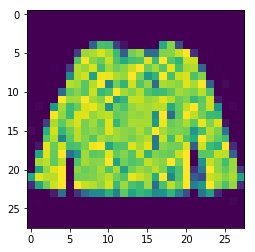

In [4]:
# Sample image in dataset
image, label = next(iter(trainloader))
image = image.view(64, 28, 28)
plt.imshow(image[0], interpolation='nearest')
plt.show()

In [5]:
# Defining neural network structure 
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)

In [6]:
# Training network
train_losses, test_losses = [], []
epochs = 30
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        output = model(images)
        
        loss = criterion(output, labels)
        loss.backward()
        
        running_loss += loss.item()
        optimizer.step()
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labls in testloader:
                images = images.view(images.shape[0], -1)
                
                log_ps = model(images)
                test_loss += criterion(log_ps, labls)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labls.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        # Averadge train loss and test loss
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

out = torch.exp(output)


Epoch: 1/30..  Training Loss: 2.132..  Test Loss: 1.723..  Test Accuracy: 0.464
Epoch: 2/30..  Training Loss: 1.220..  Test Loss: 0.926..  Test Accuracy: 0.680
Epoch: 3/30..  Training Loss: 0.812..  Test Loss: 0.755..  Test Accuracy: 0.729
Epoch: 4/30..  Training Loss: 0.692..  Test Loss: 0.668..  Test Accuracy: 0.753
Epoch: 5/30..  Training Loss: 0.627..  Test Loss: 0.619..  Test Accuracy: 0.773
Epoch: 6/30..  Training Loss: 0.581..  Test Loss: 0.585..  Test Accuracy: 0.789
Epoch: 7/30..  Training Loss: 0.546..  Test Loss: 0.556..  Test Accuracy: 0.800
Epoch: 8/30..  Training Loss: 0.520..  Test Loss: 0.539..  Test Accuracy: 0.806
Epoch: 9/30..  Training Loss: 0.500..  Test Loss: 0.521..  Test Accuracy: 0.811
Epoch: 10/30..  Training Loss: 0.484..  Test Loss: 0.514..  Test Accuracy: 0.812
Epoch: 11/30..  Training Loss: 0.471..  Test Loss: 0.495..  Test Accuracy: 0.823
Epoch: 12/30..  Training Loss: 0.460..  Test Loss: 0.488..  Test Accuracy: 0.824
Epoch: 13/30..  Training Loss: 0.451.

In [7]:
# Show training and validation accuracy
top_p, top_class = out.topk(1, dim=1)

equals = top_class == labels.view(*top_class.shape)
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Train accuracy: {accuracy*100}%')


for images, lables in testloader:
    images = images.view(images.shape[0], -1)

output = model(images)
out = torch.exp(output)
top_p, top_class = out.topk(1, dim=1)

equals = top_class == lables.view(*top_class.shape)
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Test accuracy: {accuracy*100}%')

Train accuracy: 90.625%
Test accuracy: 93.75%


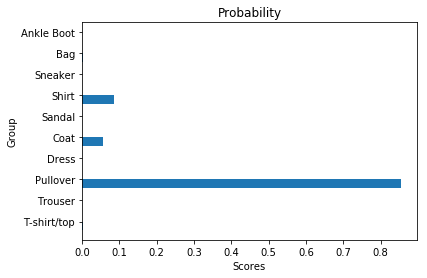

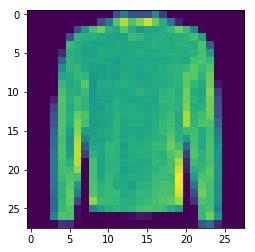

In [8]:
# Example of classification and picture of classified object
showGraph(out[0], images[0])

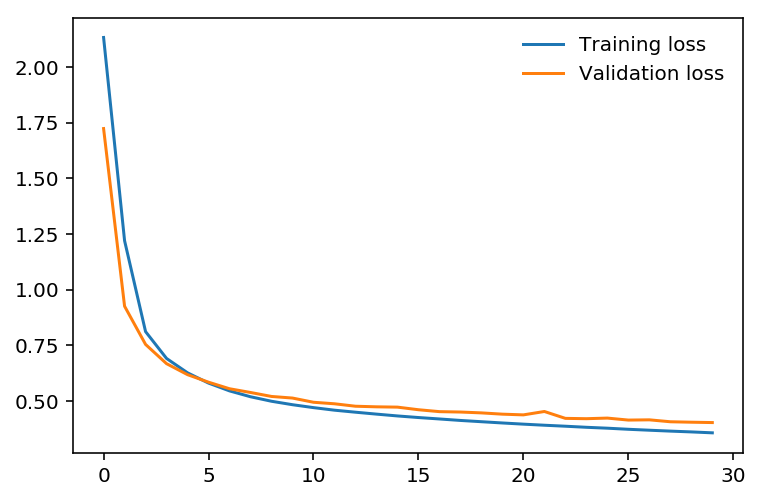

In [9]:
#Print graph for validation and training losses
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)